# Melt Rate adjusted centre

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/scratch/x77/cy8964/ISOMIP+Data/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


# Scalar Timeseries

In [3]:
#12 model colours for 12 models, generated using https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

Ocean1_COM_COCO.nc
Ocean1_COM_FVCOM.nc
Ocean1_COM_MITgcm_BAS.nc
Ocean1_COM_MITgcm_BAS_CoupledV3.nc
Ocean1_COM_MITgcm_JPL.nc
Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
Ocean1_TYP_MOM6.nc
Ocean1_COM_MPAS-Ocean.nc
Ocean1_COM_NEMO-CNRS.nc
Ocean1_COM_NEMO-UKESM1is.nc
Ocean1_COM_POP2x.nc
Ocean1_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Ocean1 melt rate')

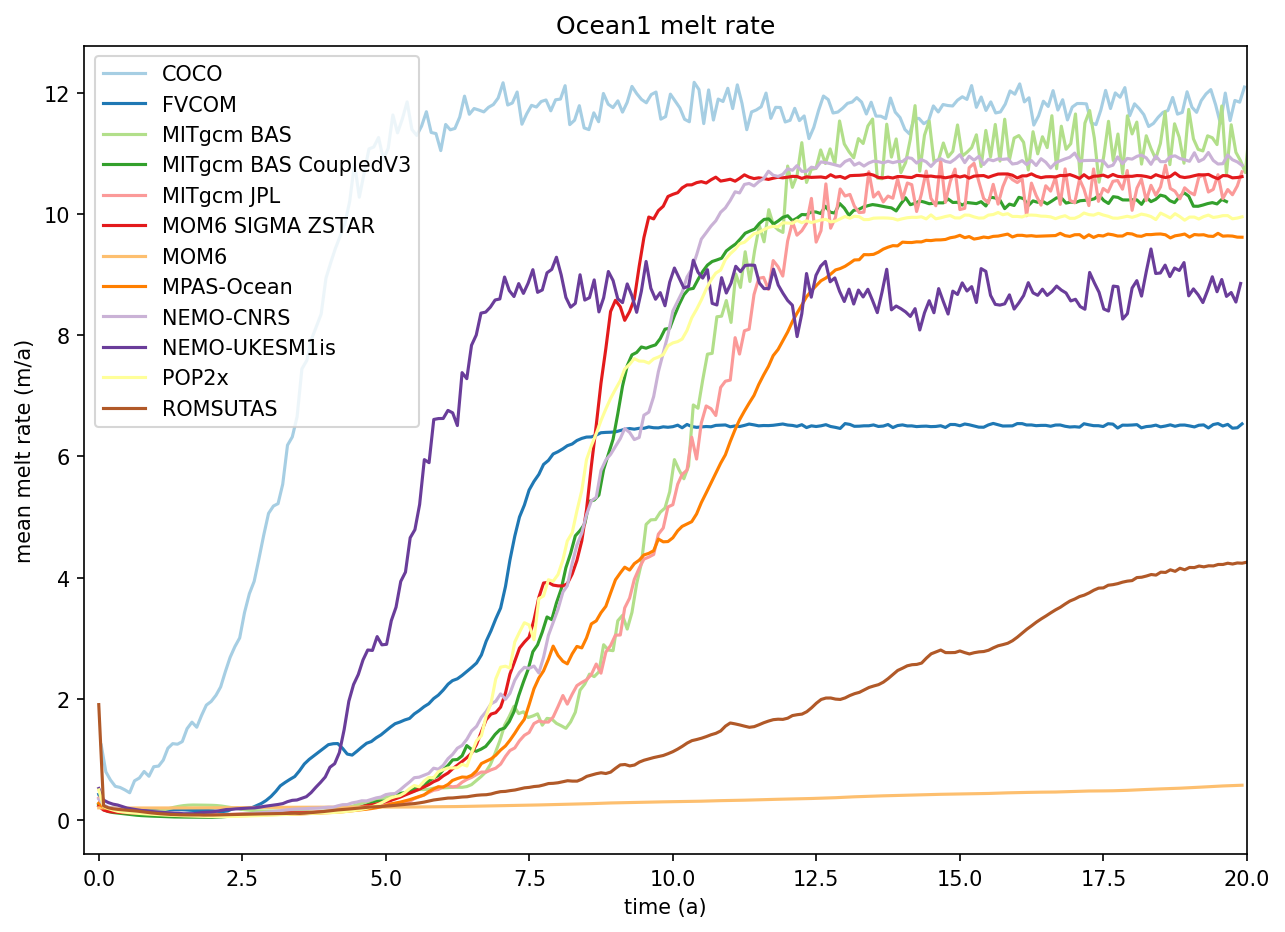

In [4]:
files = Ocean1_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
title = 'mean melt rate (m/a)'
scale = sPerYr
plt.figure(figsize = (10,7),dpi=150)
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  plt.plot(times, field, label=label,color = modelcolours[i])
  
  plt.xlabel('time (a)')
  plt.ylabel(title)
  plt.legend(loc = 'upper left')
  plt.draw()
  plt.xlim(-0.25,20)
plt.title('Ocean1 melt rate')

Ocean1_COM_COCO.nc
Ocean1_COM_FVCOM.nc
Ocean1_COM_MITgcm_BAS.nc
Ocean1_COM_MITgcm_BAS_CoupledV3.nc
Ocean1_COM_MITgcm_JPL.nc
Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
Ocean1_TYP_MOM6.nc
Ocean1_COM_MPAS-Ocean.nc
Ocean1_COM_NEMO-CNRS.nc
Ocean1_COM_NEMO-UKESM1is.nc
Ocean1_COM_POP2x.nc
Ocean1_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Ocean1 melt rate, shifted time axis, 0 is midpoint')

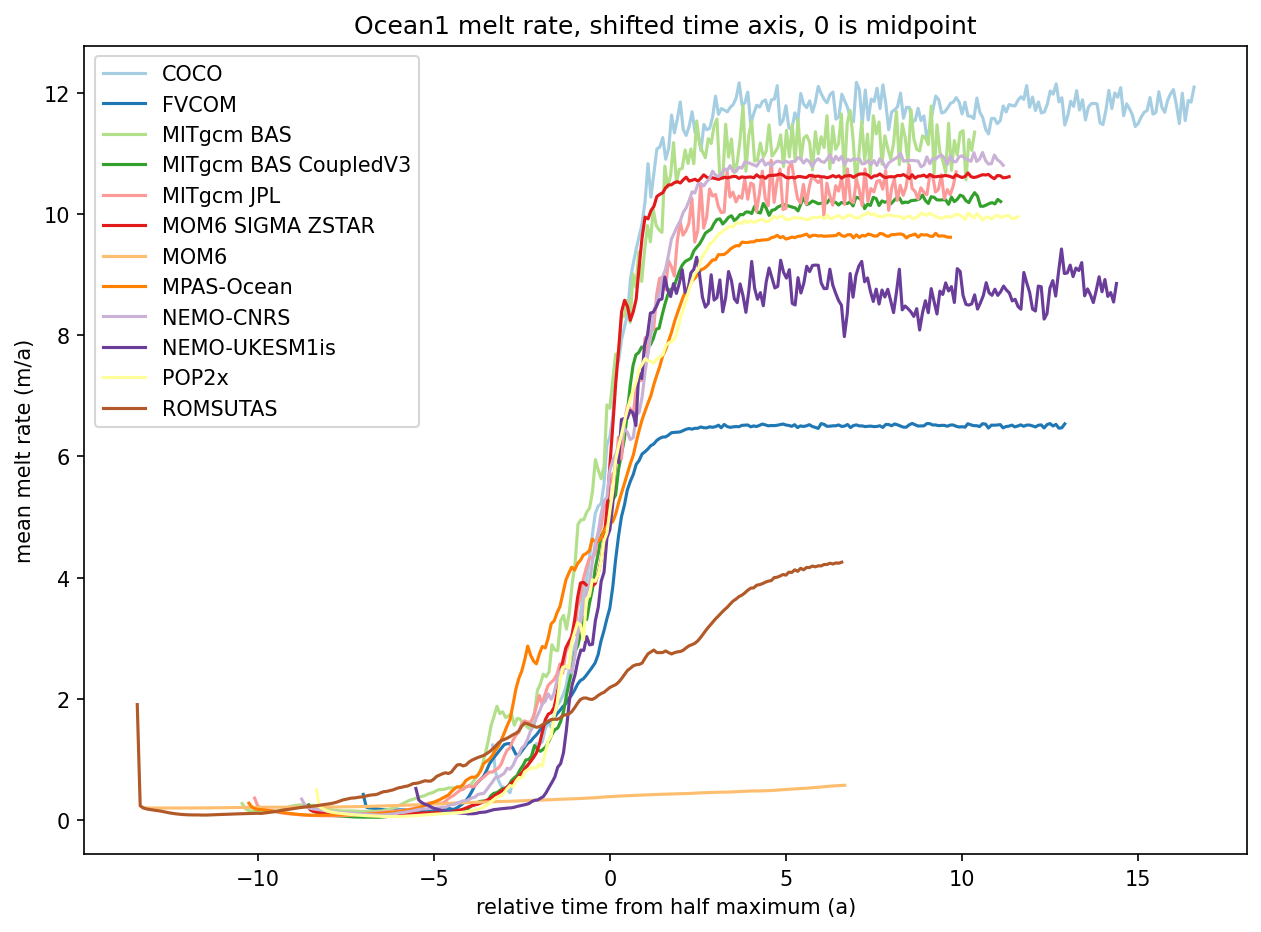

In [5]:
files = Ocean1_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
title = 'mean melt rate (m/a)'
scale = sPerYr
plt.figure(figsize = (10,7),dpi=150)
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  midptfield = 0.5 * (np.max(field) + np.min(field))
  shiftax = times[np.nanargmin(field*np.where(field>midptfield,1,np.nan))]
  #print(field*np.where(field>midptfield,1,np.nan))
  #print(shiftax)
  plt.plot(times - shiftax, field, label=label,color = modelcolours[i])
  
  plt.xlabel('relative time from half maximum (a)')
  plt.ylabel(title)
  plt.legend()
  plt.draw()

plt.title('Ocean1 melt rate, shifted time axis, 0 is midpoint')

Ocean1_COM_COCO.nc
Ocean1_COM_FVCOM.nc
Ocean1_COM_MITgcm_BAS.nc
Ocean1_COM_MITgcm_BAS_CoupledV3.nc
Ocean1_COM_MITgcm_JPL.nc
Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
Ocean1_TYP_MOM6.nc
Ocean1_COM_MPAS-Ocean.nc
Ocean1_COM_NEMO-CNRS.nc
Ocean1_COM_NEMO-UKESM1is.nc
Ocean1_COM_POP2x.nc
Ocean1_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Normalised Ocean1 melt rate, shifted time axis, 0 is midpoint')

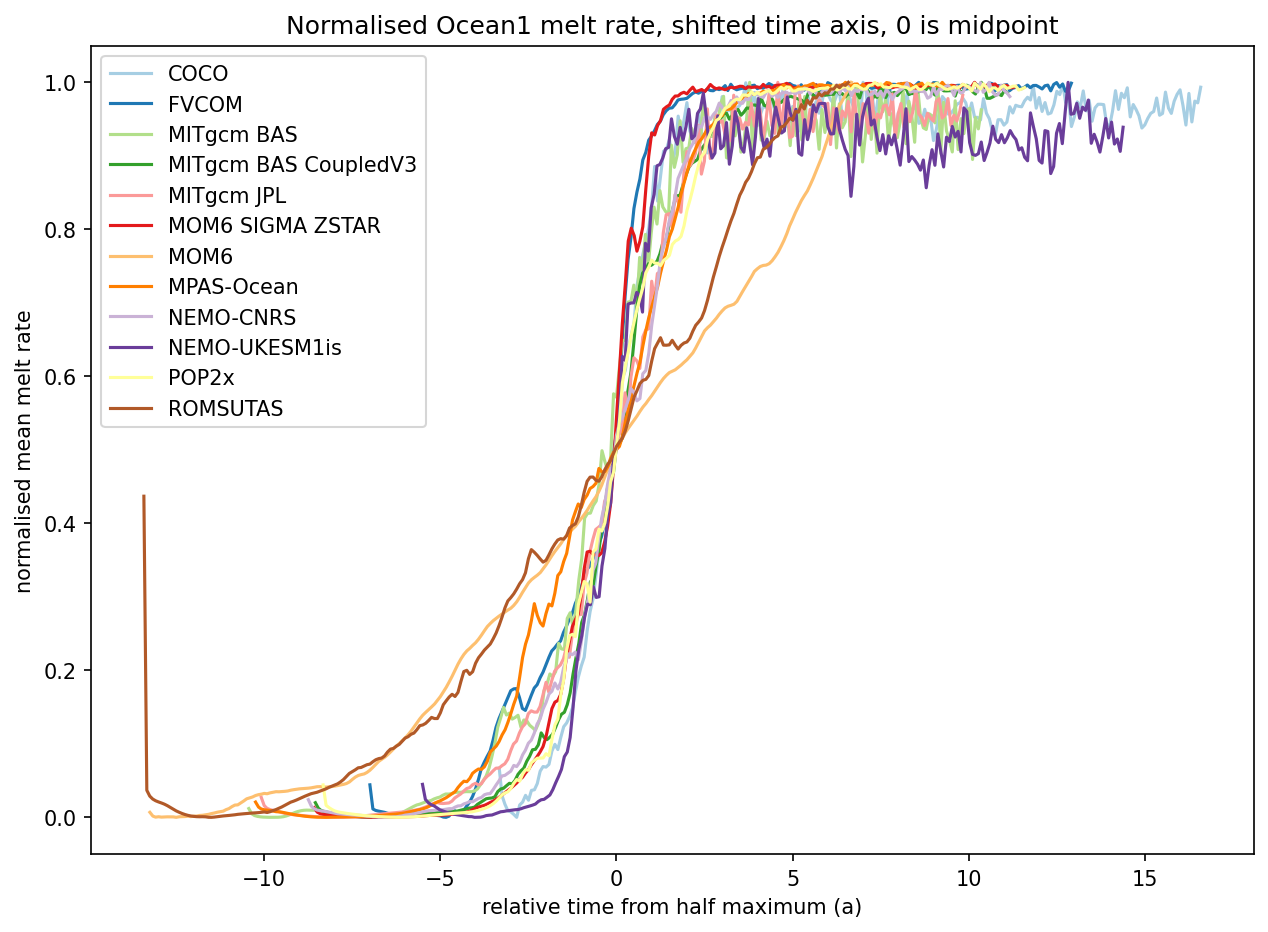

In [6]:
files = Ocean1_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
title = 'normalised mean melt rate'
scale = sPerYr
plt.figure(figsize = (10,7),dpi=150)
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  midptfield = 0.5 * (np.max(field) + np.min(field))
  shiftax = times[np.nanargmin(field*np.where(field>midptfield,1,np.nan))]
  normalampfield = (field - np.min(field))/(np.max(field)-np.min(field))
  #print(field*np.where(field>midptfield,1,np.nan))
  #print(shiftax)
  plt.plot(times - shiftax, normalampfield, label=label,color = modelcolours[i])
  
  plt.xlabel('relative time from half maximum (a)')
  plt.ylabel(title)
  plt.legend()
  plt.draw()

plt.title('Normalised Ocean1 melt rate, shifted time axis, 0 is midpoint')

Repeat for Ocean2

Ocean2_COM_COCO.nc
Ocean2_COM_FVCOM.nc
Ocean2_COM_MITgcm_BAS.nc
Ocean2_COM_MITgcm_BAS_CoupledV3.nc
Ocean2_COM_MITgcm_JPL.nc
Ocean2_COM_MOM6_SIGMA_ZSTAR.nc
Ocean2_TYP_MOM6.nc
Ocean2_COM_MPAS-Ocean.nc
Ocean2_COM_NEMO-CNRS.nc
Ocean2_COM_NEMO-UKESM1is.nc
Ocean2_COM_POP2x.nc
Ocean2_COM_ROMSUTAS.nc


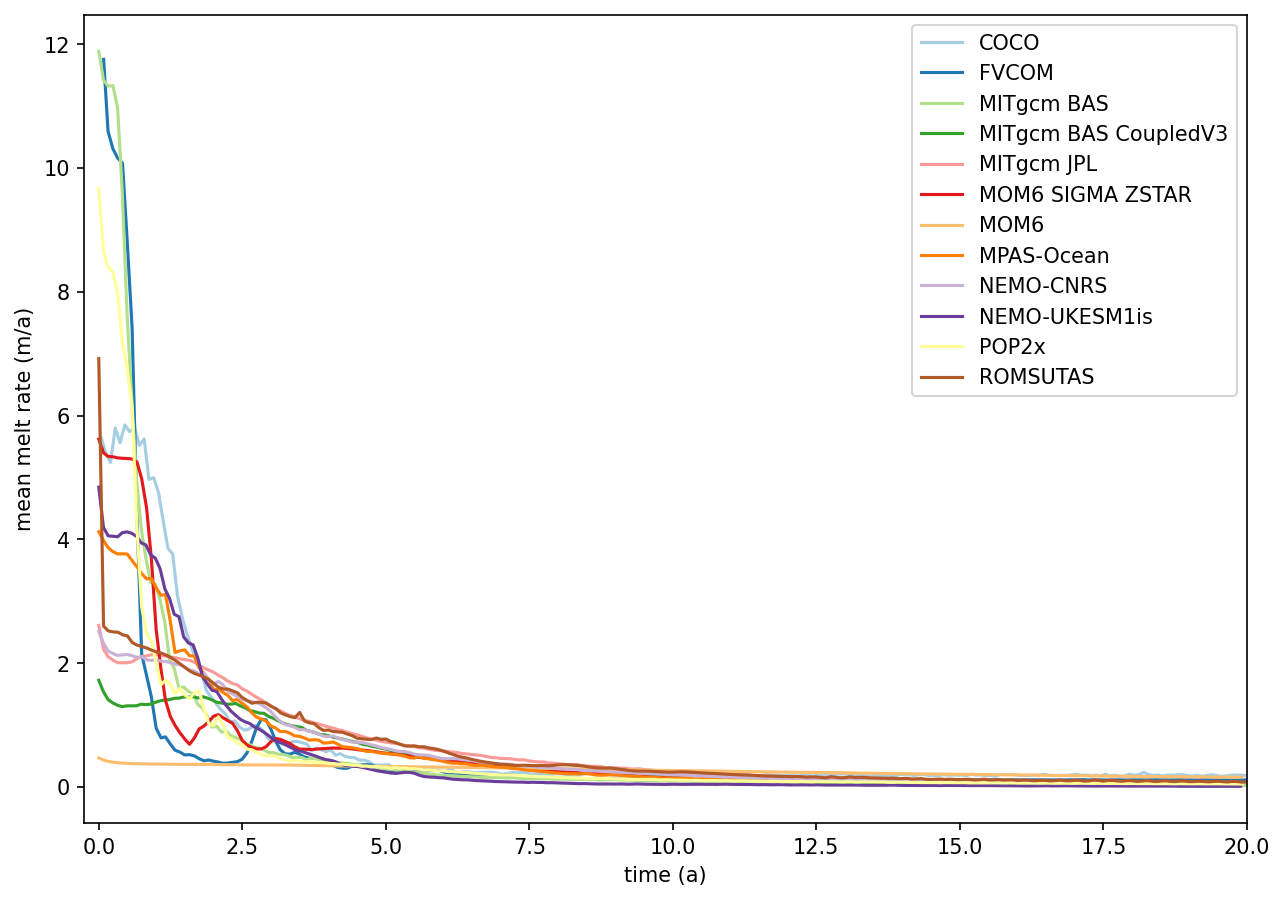

In [7]:
files = Ocean2_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
title = 'mean melt rate (m/a)'
scale = sPerYr
plt.figure(figsize = (10,7),dpi=150)
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  plt.plot(times, field, label=label,color = modelcolours[i])
  
  plt.xlabel('time (a)')
  plt.xlim(-0.25,20)
  plt.ylabel(title)
  plt.legend()
  plt.draw()


Ocean2_COM_COCO.nc
Ocean2_COM_FVCOM.nc
Ocean2_COM_MITgcm_BAS.nc
Ocean2_COM_MITgcm_BAS_CoupledV3.nc
Ocean2_COM_MITgcm_JPL.nc
Ocean2_COM_MOM6_SIGMA_ZSTAR.nc
Ocean2_TYP_MOM6.nc
Ocean2_COM_MPAS-Ocean.nc
Ocean2_COM_NEMO-CNRS.nc
Ocean2_COM_NEMO-UKESM1is.nc
Ocean2_COM_POP2x.nc
Ocean2_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Ocean2 melt rate, log scale')

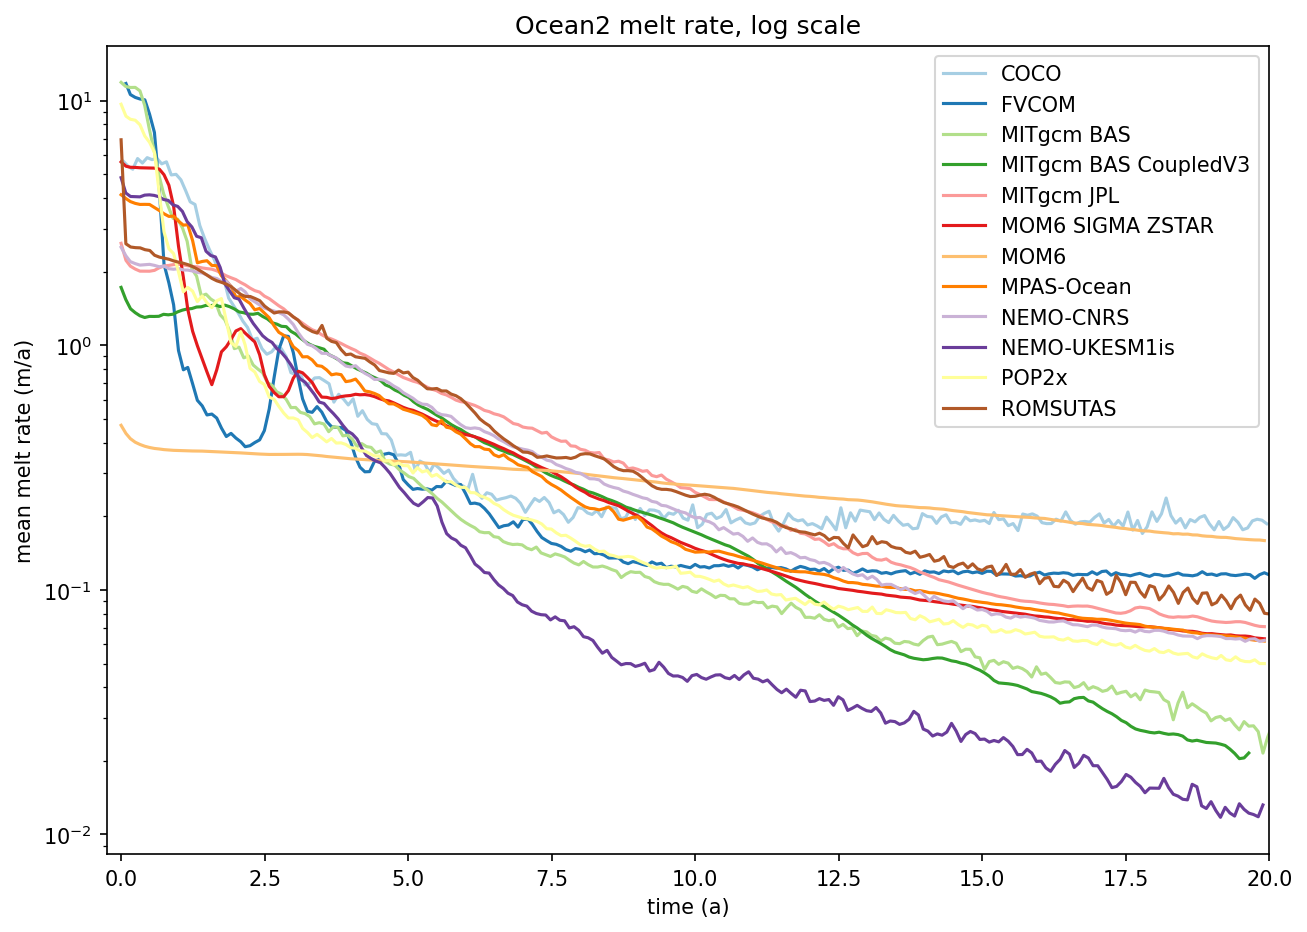

In [8]:
files = Ocean2_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
title = 'mean melt rate (m/a)'
scale = sPerYr
plt.figure(figsize = (10,7),dpi=150)
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0

  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  plt.plot(times, field, label=label,color = modelcolours[i])
  
  plt.xlabel('time (a)')
  plt.ylabel(title)
  plt.legend()
  plt.draw()
plt.yscale('log')
plt.xlim(-0.25,20)
plt.title('Ocean2 melt rate, log scale')

Ocean2_COM_COCO.nc
Ocean2_COM_FVCOM.nc
Ocean2_COM_MITgcm_BAS.nc
Ocean2_COM_MITgcm_BAS_CoupledV3.nc
Ocean2_COM_MITgcm_JPL.nc
Ocean2_COM_MOM6_SIGMA_ZSTAR.nc
Ocean2_TYP_MOM6.nc
Ocean2_COM_MPAS-Ocean.nc
Ocean2_COM_NEMO-CNRS.nc
Ocean2_COM_NEMO-UKESM1is.nc
Ocean2_COM_POP2x.nc
Ocean2_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Ocean2 melt rate, shifted time axis, 0 is midpoint')

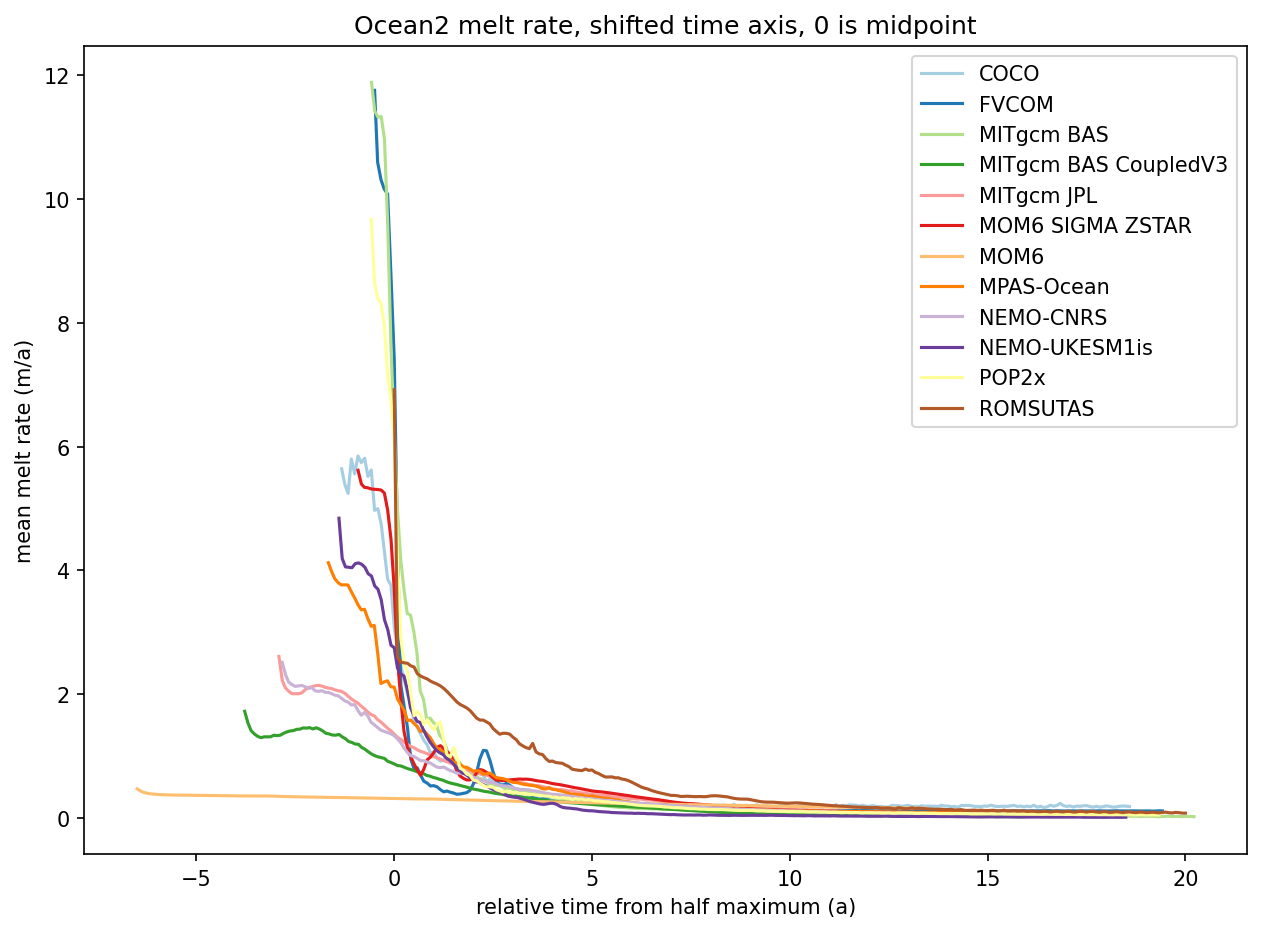

In [9]:
files = Ocean2_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
title = 'mean melt rate (m/a)'
scale = sPerYr
plt.figure(figsize = (10,7),dpi=150)
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  midptfield = 0.5 * (np.max(field) + np.min(field))
  shiftax = times[np.nanargmin(field*np.where(field>midptfield,1,np.nan))]
  #print(field*np.where(field>midptfield,1,np.nan))
  #print(shiftax)
  plt.plot(times - shiftax, field, label=label,color = modelcolours[i])
  
  plt.xlabel('relative time from half maximum (a)')
  plt.ylabel(title)
  plt.legend()
  plt.draw()

plt.title('Ocean2 melt rate, shifted time axis, 0 is midpoint')

Ocean2_COM_COCO.nc
Ocean2_COM_FVCOM.nc
Ocean2_COM_MITgcm_BAS.nc
Ocean2_COM_MITgcm_BAS_CoupledV3.nc
Ocean2_COM_MITgcm_JPL.nc
Ocean2_COM_MOM6_SIGMA_ZSTAR.nc
Ocean2_TYP_MOM6.nc
Ocean2_COM_MPAS-Ocean.nc
Ocean2_COM_NEMO-CNRS.nc
Ocean2_COM_NEMO-UKESM1is.nc
Ocean2_COM_POP2x.nc
Ocean2_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Normalised Ocean2 melt rate, shifted time axis, 0 is midpoint')

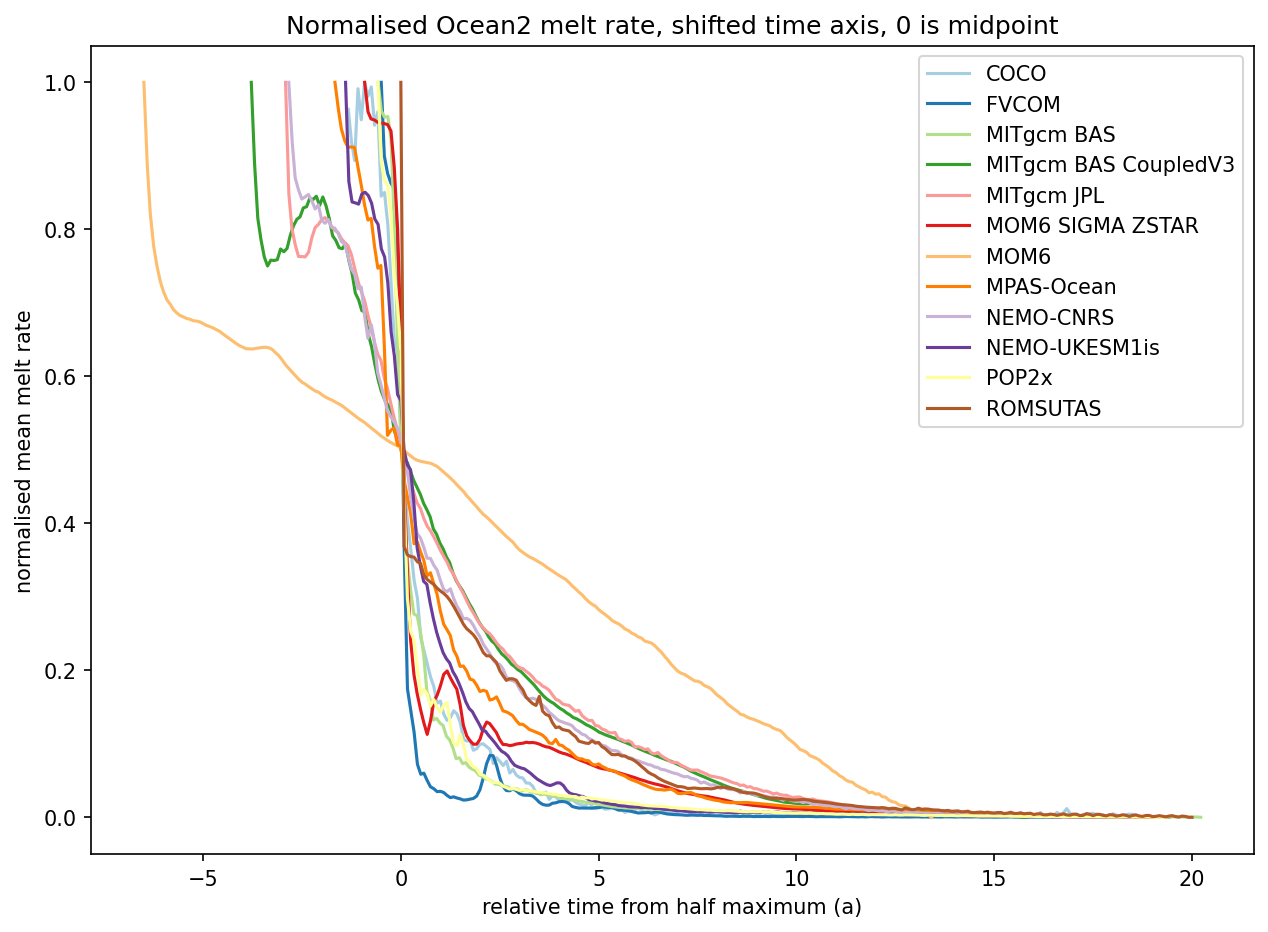

In [10]:
files = Ocean2_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
title = 'normalised mean melt rate'
scale = sPerYr
plt.figure(figsize = (10,7),dpi=150)
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  midptfield = 0.5 * (np.max(field) + np.min(field))
  shiftax = times[np.nanargmin(field*np.where(field>midptfield,1,np.nan))]
  normalampfield = (field - np.min(field))/(np.max(field)-np.min(field))
  #print(field*np.where(field>midptfield,1,np.nan))
  #print(shiftax)
  plt.plot(times - shiftax, normalampfield, label=label,color = modelcolours[i])
  
  plt.xlabel('relative time from half maximum (a)')
  plt.ylabel(title)
  plt.legend()
  plt.draw()

plt.title('Normalised Ocean2 melt rate, shifted time axis, 0 is midpoint')

# Create combined plot

Ocean1_COM_COCO.nc
Ocean1_COM_FVCOM.nc
Ocean1_COM_MITgcm_BAS.nc
Ocean1_COM_MITgcm_BAS_CoupledV3.nc
Ocean1_COM_MITgcm_JPL.nc
Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
Ocean1_TYP_MOM6.nc
Ocean1_COM_MPAS-Ocean.nc
Ocean1_COM_NEMO-CNRS.nc
Ocean1_COM_NEMO-UKESM1is.nc
Ocean1_COM_POP2x.nc
Ocean1_COM_ROMSUTAS.nc
Ocean2_COM_COCO.nc
Ocean2_COM_FVCOM.nc
Ocean2_COM_MITgcm_BAS.nc
Ocean2_COM_MITgcm_BAS_CoupledV3.nc
Ocean2_COM_MITgcm_JPL.nc
Ocean2_COM_MOM6_SIGMA_ZSTAR.nc
Ocean2_TYP_MOM6.nc
Ocean2_COM_MPAS-Ocean.nc
Ocean2_COM_NEMO-CNRS.nc
Ocean2_COM_NEMO-UKESM1is.nc
Ocean2_COM_POP2x.nc
Ocean2_COM_ROMSUTAS.nc


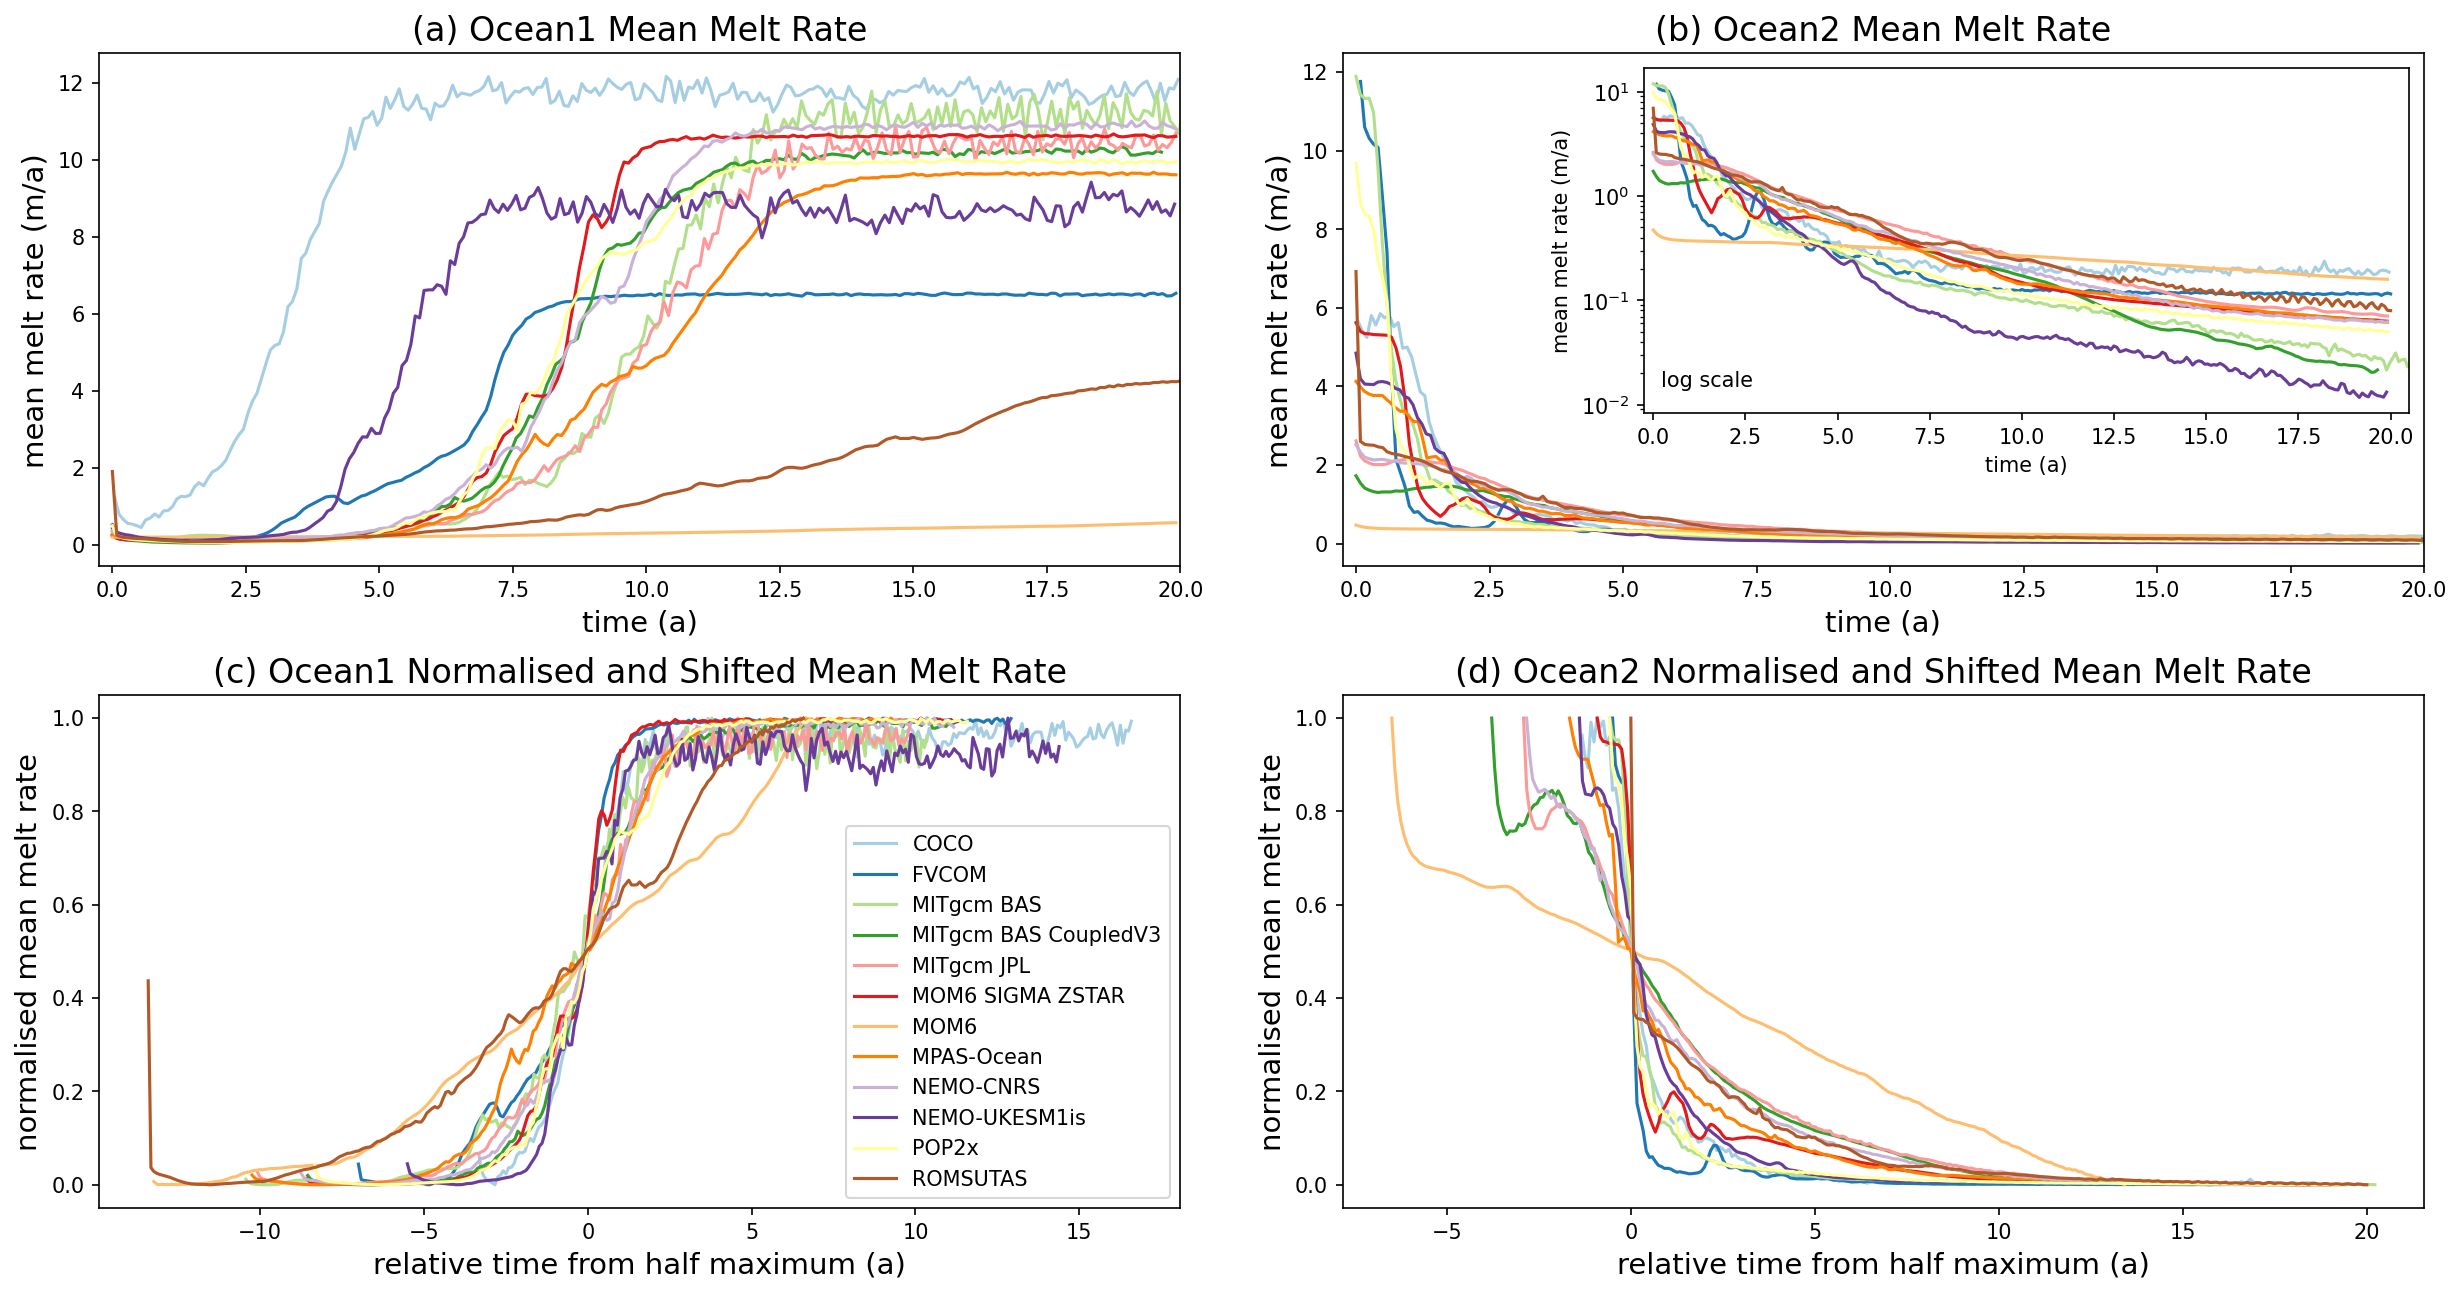

In [19]:
fig, axes = plt.subplots(figsize = (20,10),nrows = 2, ncols =2, dpi=150)

files = Ocean1_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
scale = sPerYr
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  axes[0,0].plot(times, field, label=label,color = modelcolours[i])
  

  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  midptfield = 0.5 * (np.max(field) + np.min(field))
  shiftax = times[np.nanargmin(field*np.where(field>midptfield,1,np.nan))]
  normalampfield = (field - np.min(field))/(np.max(field)-np.min(field))
  #print(field*np.where(field>midptfield,1,np.nan))
  #print(shiftax)
  axes[1,0].plot(times - shiftax, normalampfield, label=label,color = modelcolours[i])

axes[0,0].set_xlabel('time (a)', fontsize = 14)
axes[0,0].set_ylabel('mean melt rate (m/a)', fontsize = 14)
axes[0,0].set_xlim(-0.25,20)
axes[1,0].legend(loc = 'lower right')
axes[0,0].set_title('(a) Ocean1 Mean Melt Rate', fontsize = 16)

axes[1,0].set_xlabel('relative time from half maximum (a)', fontsize = 14)
axes[1,0].set_ylabel('normalised mean melt rate', fontsize = 14)
axes[1,0].set_title('(c) Ocean1 Normalised and Shifted Mean Melt Rate', fontsize = 16)

#####

files = Ocean2_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
scale = sPerYr
ax_inset = fig.add_axes([0.64,0.64,0.255,0.23])

for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = ' '.join(baseName.split('_')[2:]).split('.')[0]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  axes[0,1].plot(times, field, label=label,color = modelcolours[i])
  ax_inset.plot(times, field, label=label,color = modelcolours[i])

  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  midptfield = 0.5 * (np.max(field) + np.min(field))
  shiftax = times[np.nanargmin(field*np.where(field>midptfield,1,np.nan))]
  normalampfield = (field - np.min(field))/(np.max(field)-np.min(field))
  #print(field*np.where(field>midptfield,1,np.nan))
  #print(shiftax)
  axes[1,1].plot(times - shiftax, normalampfield, label=label,color = modelcolours[i])

axes[0,1].set_xlabel('time (a)', fontsize = 14)
axes[0,1].set_ylabel('mean melt rate (m/a)', fontsize = 14)
axes[0,1].set_xlim(-0.25,20)
#axes[0,1].legend()
axes[0,1].set_title('(b) Ocean2 Mean Melt Rate', fontsize = 16)

ax_inset.set_xlabel('time (a)')
ax_inset.set_ylabel('mean melt rate (m/a)')
ax_inset.set_yscale('log')
ax_inset.text(0.2,1.5e-2,'log scale')
ax_inset.set_xlim(-0.25,20.5)

axes[1,1].set_xlabel('relative time from half maximum (a)', fontsize = 14)
axes[1,1].set_ylabel('normalised mean melt rate', fontsize = 14)
axes[1,1].set_title('(d) Ocean2 Normalised and Shifted Mean Melt Rate', fontsize = 16)


fig.subplots_adjust(hspace = 0.25, wspace = 0.15)